In [ ]:
import pandas as pd
from EnergyDisaggregation.energydisaggregation.models.stat_model import Stats, preprocess, split_year 

: 

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [16]:
df = pd.read_csv("EnergyDisaggregation/energydisaggregation/data_storage/df_process.csv", sep=",")
print(len(df))

736128


In [17]:
df['Région'].unique()

array(['Auvergne-Rhône-Alpes', 'Bourgogne-Franche-Comté', 'Bretagne',
       'Centre-Val de Loire', 'Grand Est', 'Hauts-de-France', 'Normandie',
       'Nouvelle-Aquitaine', 'Occitanie', 'Pays de la Loire',
       "Provence-Alpes-Côte d'Azur", 'Île-de-France'], dtype=object)

In [18]:
df.columns

Index(['Date - Heure', 'Région', 'consommation brute électricité (mw) - rte',
       'température (°c)', 'nebulosité totale', 'vitesse du vent moyen 10 mn',
       'humidité', 'vitesse du vent en km/h', 'température ressentie',
       'saison', 'week_day', 'month', 'hour', 'is_holiday', 'is_bank_holiday',
       'day_of_year', 'years', 'regions', 'temperature_seuil', 'saturation',
       'diff_seuil', 'température ressentie.1', 'température (°c)_mean_48',
       'température (°c)_std_48', 'température (°c)_max_48',
       'température (°c)_min_48', 'nebulosité totale_mean_3',
       'nebulosité totale_std_3', 'month_sin', 'month_cos', 'week_day_sin',
       'week_day_cos', 'hour_sin', 'hour_cos',
       'consommation brute électricité (mw) - rte_lag_1',
       'consommation brute électricité (mw) - rte_lag_2',
       'consommation brute électricité (mw) - rte_lag_3',
       'consommation brute électricité (mw) - rte_lag_4',
       'consommation brute électricité (mw) - rte_lag_5',
    

### Choose the region

In [19]:
df = df[df['Région']=="Bretagne"]

Pre-process the data for stat model implementation

In [20]:
df_prepro = preprocess(df)
df_prepro

,consommation brute électricité (mw) - rte,température (°c)_mean_48,nebulosité totale_mean_3,is_holiday,is_bank_holiday,Région,hour_0,hour_1,hour_2,hour_3,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
Date - Heure,,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+01:00,3050.0,-0.566146,94.416667,True,True,Bretagne,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-01-01 01:00:00+01:00,5601.0,-0.334028,85.750000,True,True,Bretagne,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-01-01 02:00:00+01:00,5730.0,-0.090104,77.083333,True,True,Bretagne,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2013-01-01 03:00:00+01:00,5172.0,0.165625,75.000000,True,True,Bretagne,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2013-01-01 04:00:00+01:00,4742.0,0.422743,74.583333,True,True,Bretagne,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00+01:00,7050.0,5.883160,100.000000,True,False,Bretagne,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2019-12-31 20:00:00+01:00,6608.0,5.959375,100.000000,True,False,Bretagne,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2019-12-31 21:00:00+01:00,6214.0,6.043229,100.000000,True,False,Bretagne,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Separate the data in train and test

In [21]:
X_train, X_test, y_train, y_test = split_year(df_prepro, 2018)

8760 52584


In [22]:
from sklearn.ensemble import HistGradientBoostingRegressor

In [23]:
# Create a linear regression model
lr_model = HistGradientBoostingRegressor()
# Create a Stats object
stats_model = Stats(model=lr_model)
# Fit the Stats model to the training data
stats_model.fit(X_train, y_train)

In [24]:
stats_model.score(X_test, y_test)

0.9462353493470013

In [25]:
conso_pred, conso_reg, conso_therm = stats_model.predict_therm_reg(X_train=X_train, X_test=X_test, year_to_pred=2018)

8760 8784
8760
Progress : .... 0.0 %
Progress : .... 1.14 %
Progress : .... 2.28 %
Progress : .... 3.42 %
Progress : .... 4.57 %
Progress : .... 5.71 %
Progress : .... 6.85 %
Progress : .... 7.99 %
Progress : .... 9.13 %
Progress : .... 10.27 %
Progress : .... 11.42 %
Progress : .... 12.56 %
Progress : .... 13.7 %
Progress : .... 14.84 %
Progress : .... 15.98 %
Progress : .... 17.12 %
Progress : .... 18.26 %
Progress : .... 19.41 %
Progress : .... 20.55 %
Progress : .... 21.69 %
Progress : .... 22.83 %
Progress : .... 23.97 %
Progress : .... 25.11 %
Progress : .... 26.26 %
Progress : .... 27.4 %
Progress : .... 28.54 %
Progress : .... 29.68 %
Progress : .... 30.82 %
Progress : .... 31.96 %
Progress : .... 33.11 %
Progress : .... 34.25 %
Progress : .... 35.39 %
Progress : .... 36.53 %
Progress : .... 37.67 %
Progress : .... 38.81 %
Progress : .... 39.95 %
Progress : .... 41.1 %
Progress : .... 42.24 %
Progress : .... 43.38 %
Progress : .... 44.52 %
Progress : .... 45.66 %
Progress : ...

### Results analysis

In [26]:
X_2018 =  X_test[(pd.to_datetime(X_test.index).year==2018)]
X_2018["conso_therm"] = conso_therm
X_2018["conso_reg"] = conso_reg
X_2018["conso_pred"] = conso_pred

In [35]:
px.line(X_2018[['conso_pred', 'conso_reg', 'conso_therm']])

<AxesSubplot: xlabel='Date - Heure'>

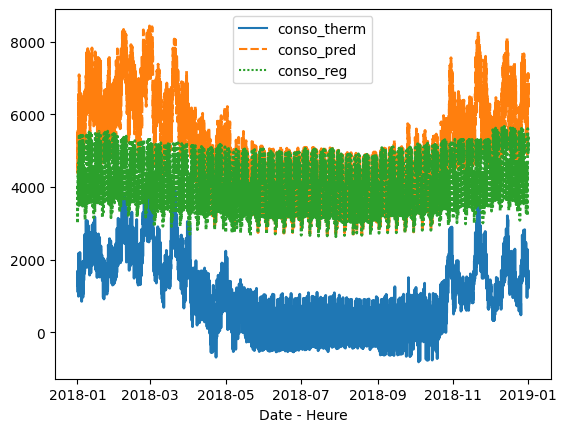

In [39]:
sns.lineplot(data=X_2018[['conso_therm', 'conso_pred', 'conso_reg']], lw=2)

In [40]:
from EnergyDisaggregation.energydisaggregation.evaluation.check_independence import eval_corr
from EnergyDisaggregation.energydisaggregation.evaluation.check_temperature import eval_temp_var

In [42]:
eval_corr(X_train, X_test, 2018, conso_pred, conso_reg, conso_therm)

,corr_therm,corr_reg,corr_therm_day,corr_reg_day
2018,-0.891983,-0.223955,-0.930682,-0.332641


In [43]:
robust_therm = eval_temp_var(model=stats_model,X_train=X_train, X_test=X_test, year_to_pred=2018,n=5, conso_pred=conso_pred, conso_reg=conso_reg, conso_therm=conso_therm)

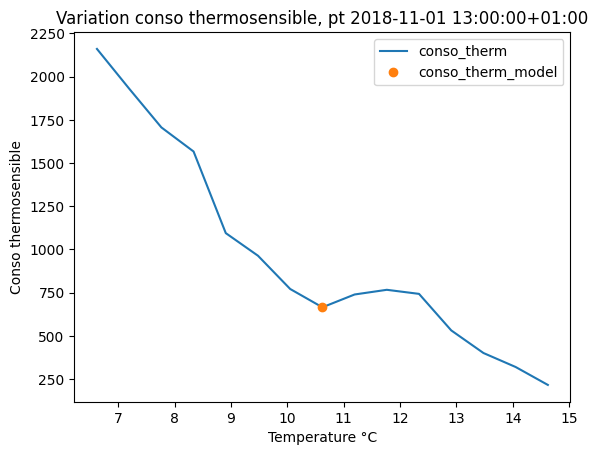

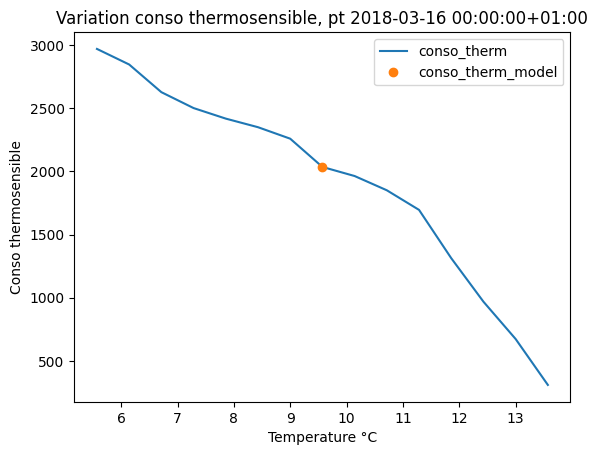

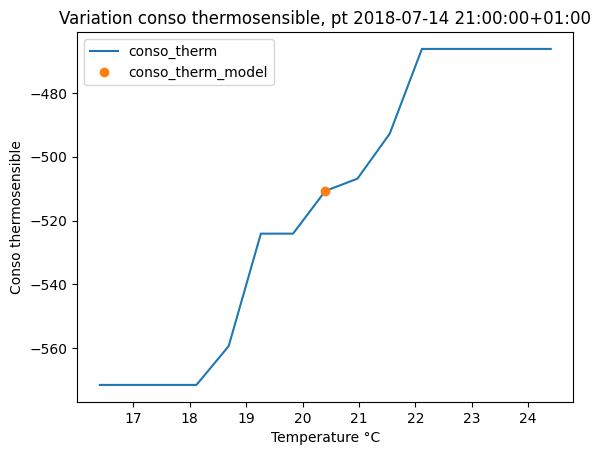

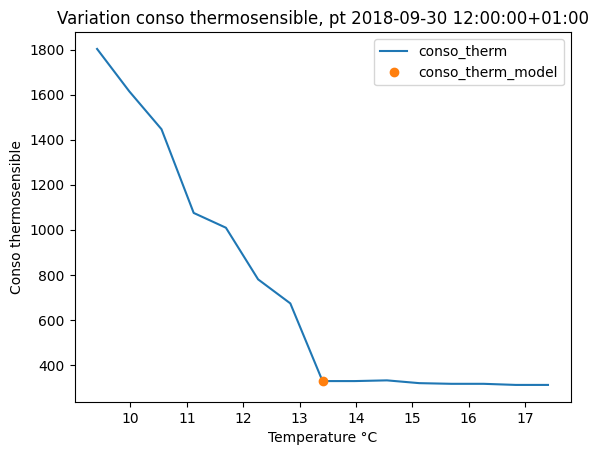

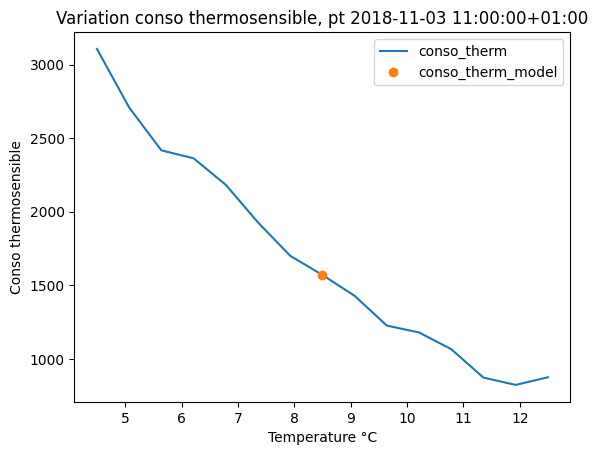

In [44]:
for key in robust_therm:
    plt.figure()
    plt.xlabel("Temperature °C")
    plt.ylabel("Conso thermosensible")
    plt.title("Variation conso thermosensible, pt "+str(key))
    pt_temp = robust_therm[key][0]
    list_temp = list(robust_therm[key][1])
    list_conso_temp = robust_therm[key][2]
    plt.plot(list_temp, list_conso_temp, label="conso_therm")
    plt.plot(list_temp[len(list_temp)//2], pt_temp , 'o', label="conso_therm_model")
    plt.legend()